# Plot 1xs result as a function for PhT, for different z(in one plot, separate by color and offset) per Q2 bins, for one phih bin(-Pi to Pi), so there are lots of PhT bins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf


In [2]:
Kaon_sys=0.15
def Get_weighted_average(value,error):
    Factor=(0.3894*1e6)
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += Factor*value[i]/((Factor)**2*error[i]**2)
        sum_sigma += 1/(Factor**2*error[i]**2)
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)

In [3]:

#for pip
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_lowQ2_Pt_lumi3_He3_kaon.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.147348,0.462513,0.326740,1.392576,0.025845,FUUT,0.008832,0.000842,0.0,0.0,He3,K+,solid,0.000842
1,1,11.0,0.143554,0.472338,0.326655,1.380867,0.047134,FUUT,0.008742,0.000820,0.0,0.0,He3,K+,solid,0.000820
2,2,11.0,0.140377,0.480653,0.326604,1.371272,0.060584,FUUT,0.008660,0.000825,0.0,0.0,He3,K+,solid,0.000825
3,3,11.0,0.137640,0.487800,0.326407,1.362707,0.070410,FUUT,0.008590,0.000875,0.0,0.0,He3,K+,solid,0.000875
4,4,11.0,0.135436,0.493639,0.326293,1.355800,0.078494,FUUT,0.008526,0.000842,0.0,0.0,He3,K+,solid,0.000842


In [4]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


313
249
190
150
120
95


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

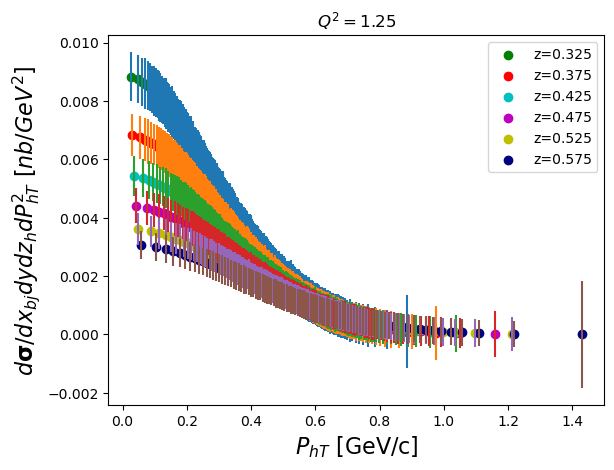

In [5]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


14
14
14
14
14
14


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

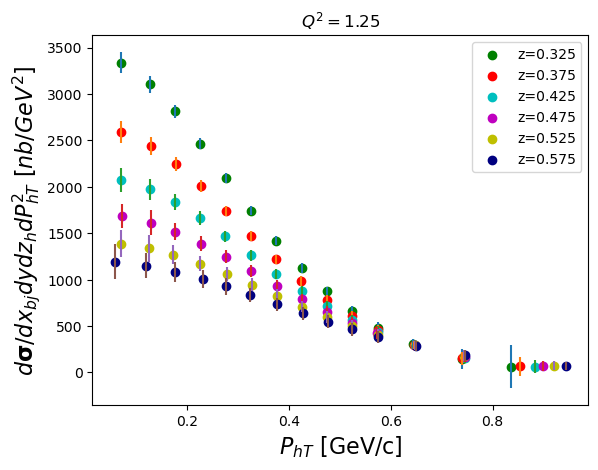

In [6]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers_kaon.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*Kaon_sys
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

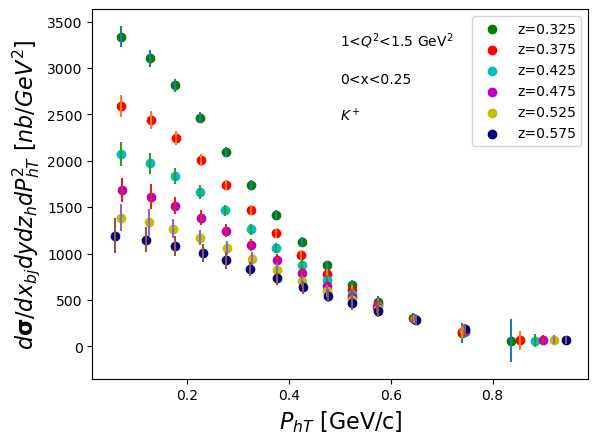

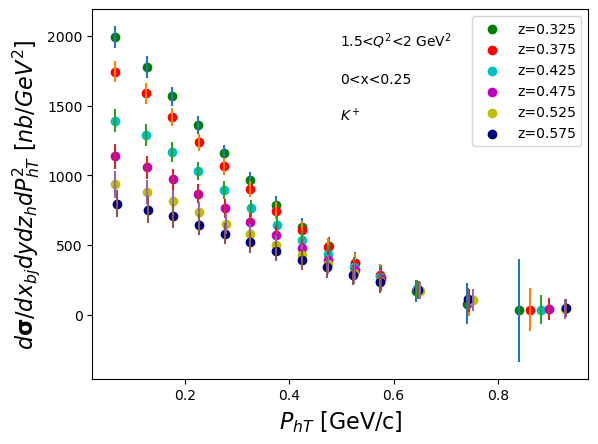

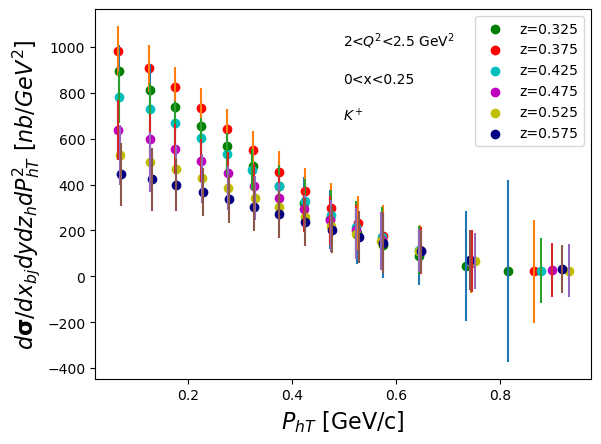

In [7]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pip_11_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*Kaon_sys
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$K^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_11_pip_kaon.pdf')
file.close()

8
8
8


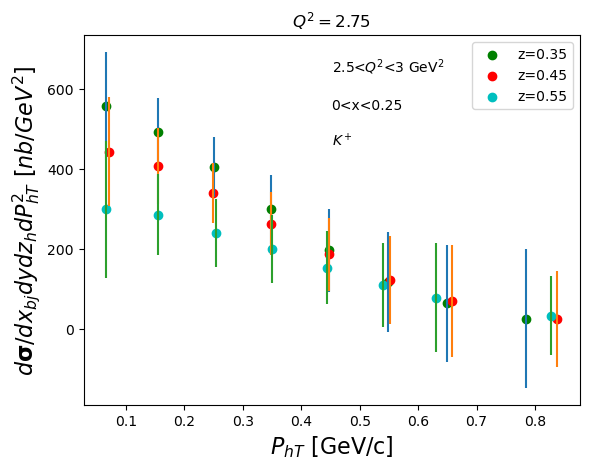

In [8]:
#plot for the Q2 bins
i_Q2=4
z_cuts=[0.3,0.4,0.5,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,1.6]
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pip_11_Q22.5-3_He3_kaon.txt','w')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*Kaon_sys
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))

        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
plt.text(.5,.7,'$K^+$',transform=plt.gca().transAxes)
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_11_pip_kaon.pdf')
file.close()

In [9]:
#for pip, lowQ2, x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[1,1.5,2,2.5,3]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]

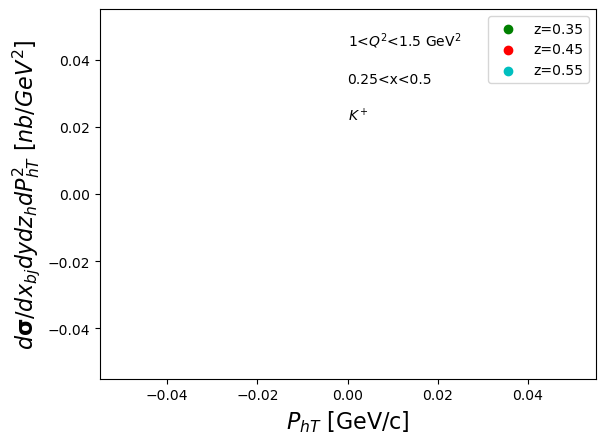

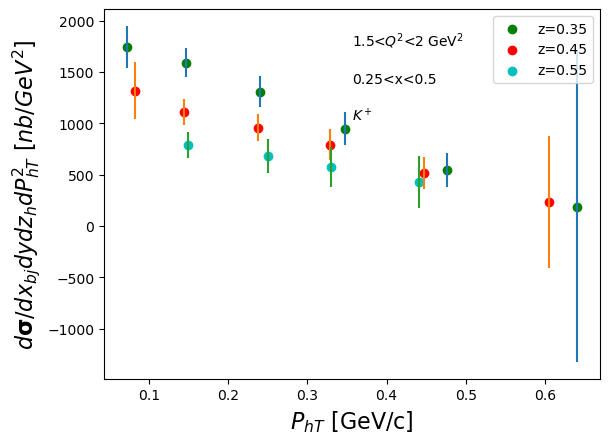

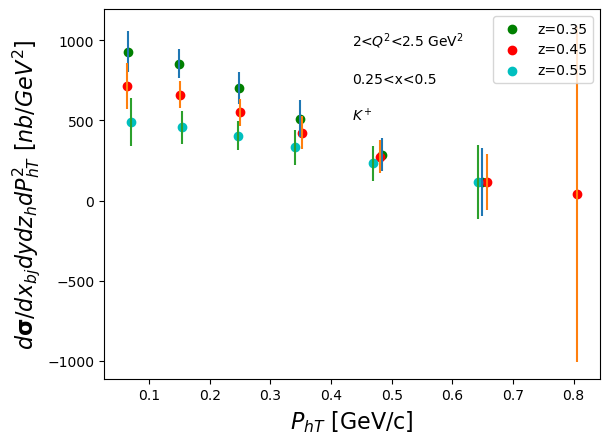

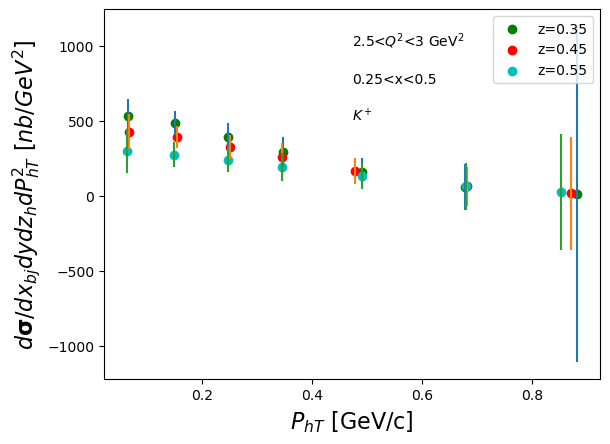

In [10]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pip_11_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*Kaon_sys
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$K^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x2_'+str(i_Q2)+'_11_pip_kaon.pdf')
file.close()

In [11]:

#for high Q2 pip
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_highQ2_Pt_lumi3_He3_kaon.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.318603,0.524146,0.323862,3.411246,0.017617,FUUT,0.000713,0.001240,0.0,0.0,He3,K+,solid,0.001240
1,1,11.0,0.319955,0.522328,0.323924,3.412053,0.032390,FUUT,0.000708,0.001243,0.0,0.0,He3,K+,solid,0.001243
2,2,11.0,0.320744,0.520859,0.324030,3.408873,0.042180,FUUT,0.000705,0.001239,0.0,0.0,He3,K+,solid,0.001239
3,3,11.0,0.321776,0.519603,0.324070,3.409462,0.050236,FUUT,0.000700,0.001228,0.0,0.0,He3,K+,solid,0.001228
4,4,11.0,0.322484,0.518625,0.324096,3.408557,0.057156,FUUT,0.000696,0.001257,0.0,0.0,He3,K+,solid,0.001257


In [12]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.5,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,5,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


302
187
113


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

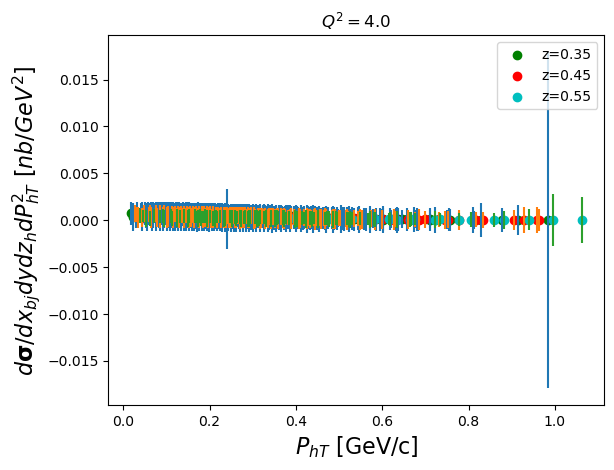

In [13]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


df length after pt cut 34
df length after pt cut 36
df length after pt cut 39
df length after pt cut 36
df length after pt cut 32
df length after pt cut 26
df length after pt cut 21
df length after pt cut 18
df length after pt cut 14
df length after pt cut 12
df length after pt cut 9
df length after pt cut 25
12
df length after pt cut 15
df length after pt cut 19
df length after pt cut 21
df length after pt cut 22
df length after pt cut 20
df length after pt cut 18
df length after pt cut 15
df length after pt cut 13
df length after pt cut 9
df length after pt cut 9
df length after pt cut 8
df length after pt cut 18
12
df length after pt cut 8
df length after pt cut 9
df length after pt cut 10
df length after pt cut 13
df length after pt cut 12
df length after pt cut 11
df length after pt cut 11
df length after pt cut 7
df length after pt cut 8
df length after pt cut 5
df length after pt cut 4
df length after pt cut 15
12


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\\phi_h}$ [$nb/GeV^2$]')

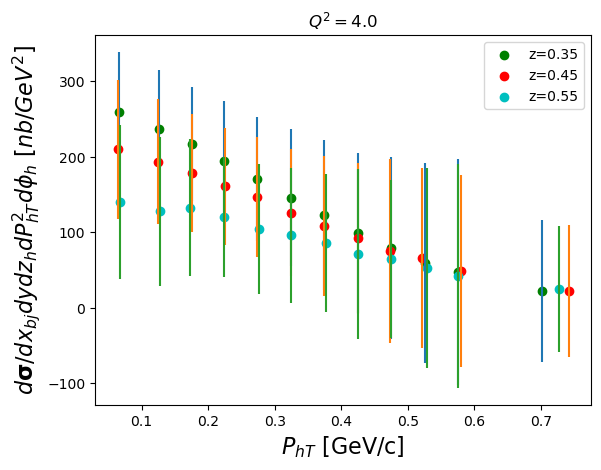

In [14]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers_kaon.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        print('df length after pt cut',len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*Kaon_sys
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

3.141592653589793
Q2 l 3
z l  0.3
df length after pt cut 163
df length after pt cut 163
df length after pt cut 77
df length after pt cut 37
4
z l  0.4
df length after pt cut 121
df length after pt cut 175
df length after pt cut 93
df length after pt cut 49
4


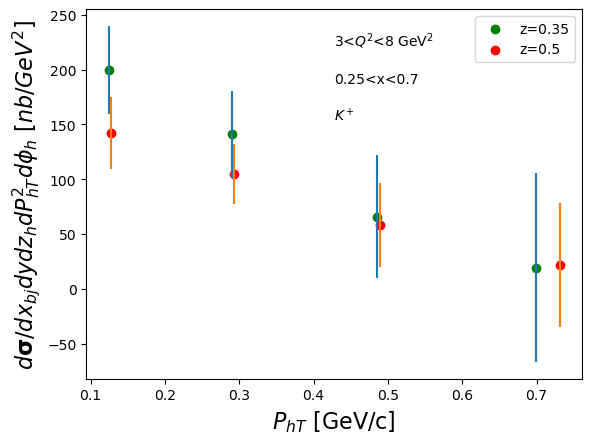

In [15]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.2,0.4,0.6,1.6]
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_hQ2_x2_pip_11_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']
    print('Q2 l',Q2_cuts[i_Q2-1])
    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        print('z l ',z_cuts[i_z-1])
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            print('df length after pt cut',len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*Kaon_sys
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
    plt.text(.5,.7,'$K^+$',transform=plt.gca().transAxes)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_hQ2_Pt_'+str(i_Q2)+'_11_pip_kaon.pdf')
file.close()

In [16]:
#For Pi-

In [17]:
#for pim

df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpim_lowQ2_Pt_lumi3_He3_kaon.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.145727,0.466560,0.318412,1.388449,0.029674,FUUT,0.008314,0.001498,0.0,0.0,He3,K-,solid,0.001498
1,1,11.0,0.139933,0.481330,0.318378,1.370080,0.053752,FUUT,0.008207,0.001404,0.0,0.0,He3,K-,solid,0.001404
2,2,11.0,0.135629,0.492480,0.318393,1.355940,0.068584,FUUT,0.008122,0.001441,0.0,0.0,He3,K-,solid,0.001441
3,3,11.0,0.132076,0.502235,0.318557,1.345011,0.079819,FUUT,0.008050,0.001404,0.0,0.0,He3,K-,solid,0.001404
4,4,11.0,0.129409,0.509773,0.318554,1.336586,0.089382,FUUT,0.007966,0.001373,0.0,0.0,He3,K-,solid,0.001373


In [18]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


237
180
135
104
80
62


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

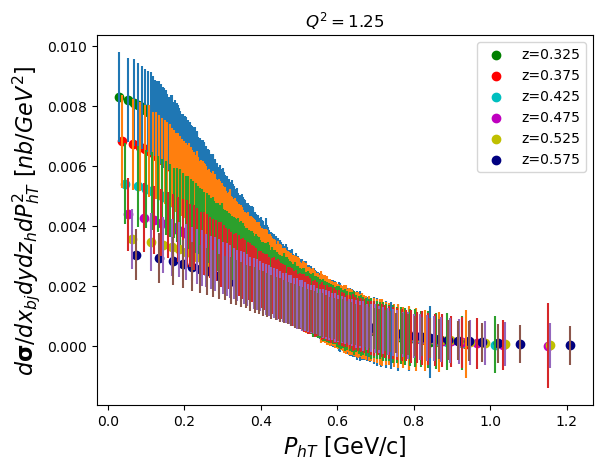

In [19]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


14
14
14
14
14
14


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

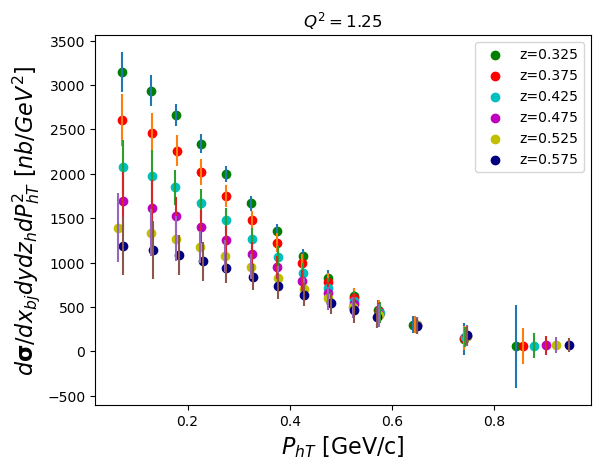

In [20]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers_kaon.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*Kaon_sys
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

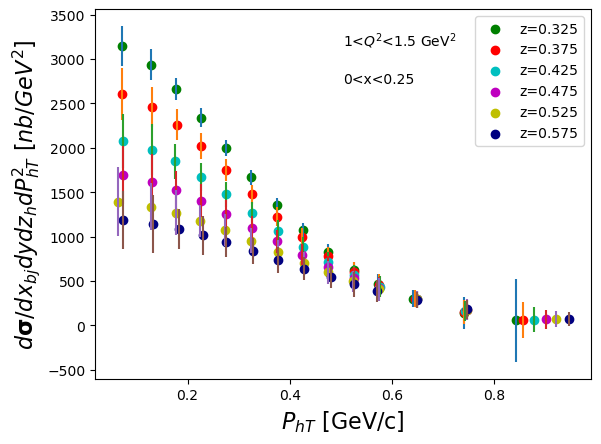

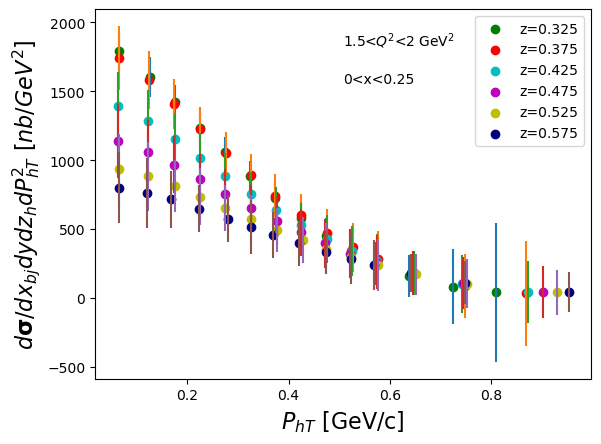

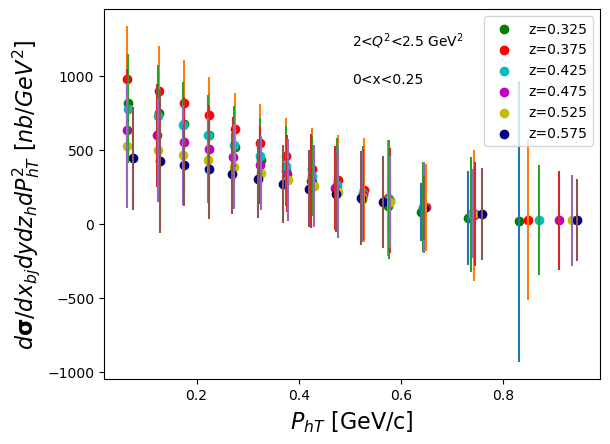

In [21]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pim_11_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*Kaon_sys
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_11_pim_kaon.pdf')
file.close()

8
8
8


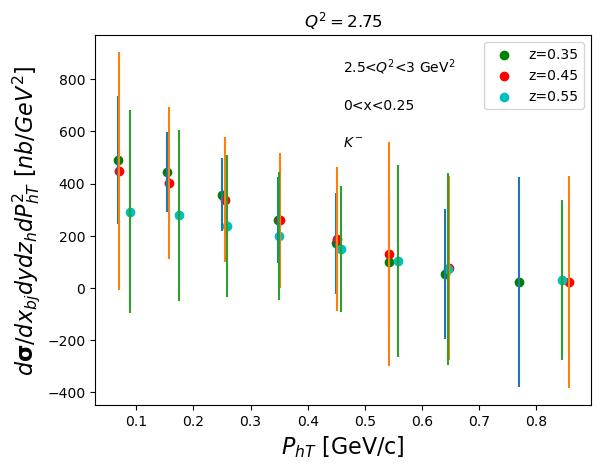

In [22]:
#plot for the Q2 bins
i_Q2=4
z_cuts=[0.3,0.4,0.5,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,1.6]
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pim_11_Q22.5-3_He3_kaon.txt','w')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*Kaon_sys
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))

        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
plt.text(.5,.7,'$K^-$',transform=plt.gca().transAxes)
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_11_pim_kaon.pdf')
file.close()

In [23]:
#for pi- x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[1,1.5,2,2.5,3]
z_cuts=[0.3,0.4,0.5,0.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]

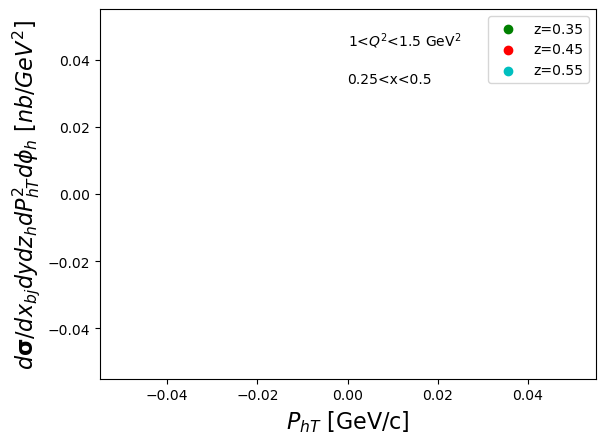

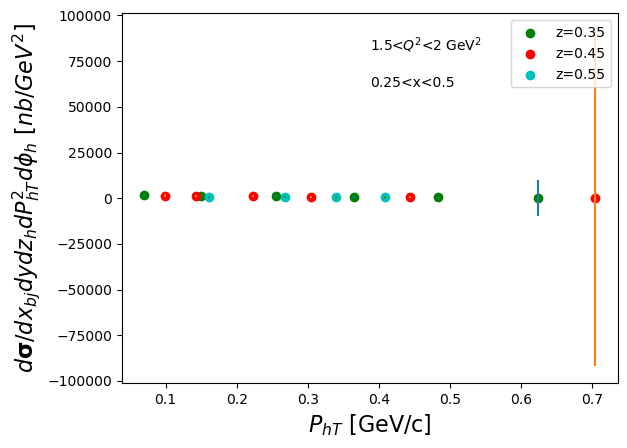

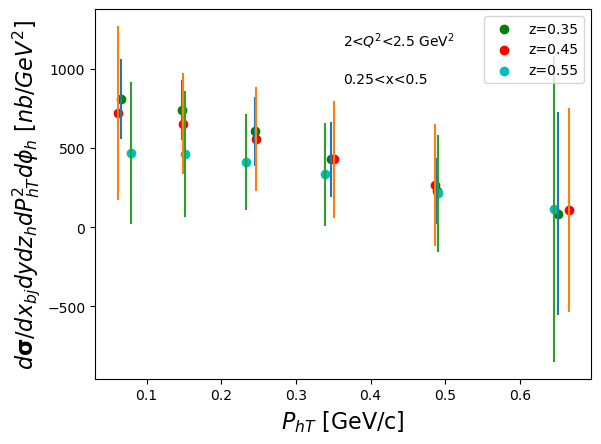

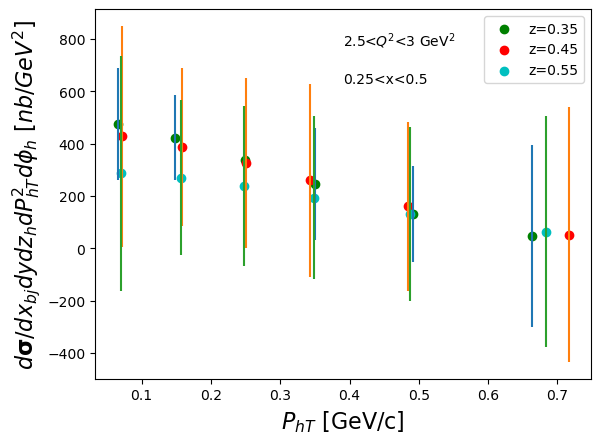

In [24]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pim_11_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*Kaon_sys
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x2_'+str(i_Q2)+'_11_pim_kaon.pdf')
file.close()

In [25]:
#for pim

df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpim_highQ2_Pt_lumi3_He3_kaon.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.316130,0.522807,0.321877,3.375876,0.021249,FUUT,0.000747,0.001764,0.0,0.0,He3,K-,solid,0.001764
1,1,11.0,0.317173,0.520924,0.321875,3.372485,0.039323,FUUT,0.000742,0.001731,0.0,0.0,He3,K-,solid,0.001731
2,2,11.0,0.318232,0.519507,0.321855,3.371510,0.051454,FUUT,0.000737,0.001722,0.0,0.0,He3,K-,solid,0.001722
3,3,11.0,0.319240,0.518280,0.321946,3.371684,0.061360,FUUT,0.000729,0.001742,0.0,0.0,He3,K-,solid,0.001742
4,4,11.0,0.320054,0.517114,0.322003,3.370592,0.069846,FUUT,0.000724,0.001761,0.0,0.0,He3,K-,solid,0.001761


In [26]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.5,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,5,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


201
114
63


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\\phi_h}$ [$nb/GeV^2$]')

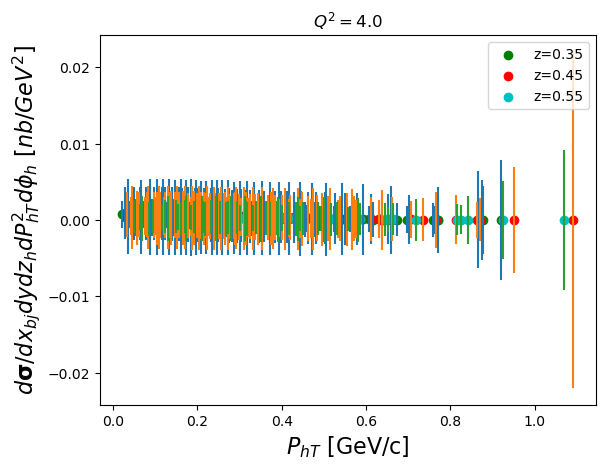

In [27]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)


df length after pt cut 23
df length after pt cut 24
df length after pt cut 25
df length after pt cut 25
df length after pt cut 19
df length after pt cut 18
df length after pt cut 15
df length after pt cut 11
df length after pt cut 8
df length after pt cut 9
df length after pt cut 6
df length after pt cut 18
12
df length after pt cut 9
df length after pt cut 11
df length after pt cut 14
df length after pt cut 12
df length after pt cut 13
df length after pt cut 10
df length after pt cut 9
df length after pt cut 9
df length after pt cut 6
df length after pt cut 4
df length after pt cut 4
df length after pt cut 13
12
df length after pt cut 5
df length after pt cut 4
df length after pt cut 6
df length after pt cut 7
df length after pt cut 6
df length after pt cut 6
df length after pt cut 6
df length after pt cut 6
df length after pt cut 3
df length after pt cut 2
df length after pt cut 3
df length after pt cut 9
12


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

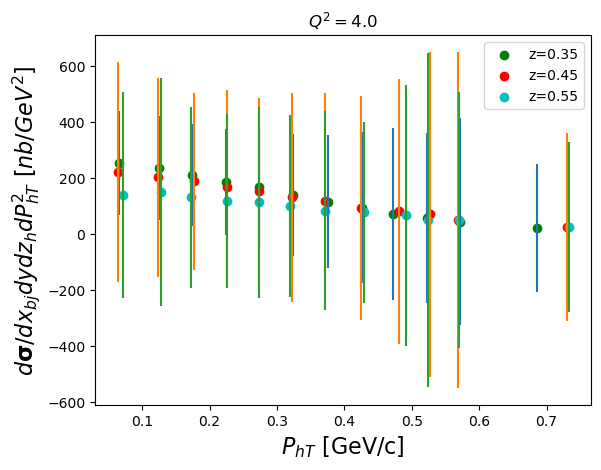

In [28]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers_kaon.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        print('df length after pt cut',len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*Kaon_sys
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

3.141592653589793
Q2 l 3
z l  0.3
df length after pt cut 106
df length after pt cut 108
df length after pt cut 52
df length after pt cut 26
4
z l  0.4
df length after pt cut 71
df length after pt cut 99
df length after pt cut 56
df length after pt cut 31
4


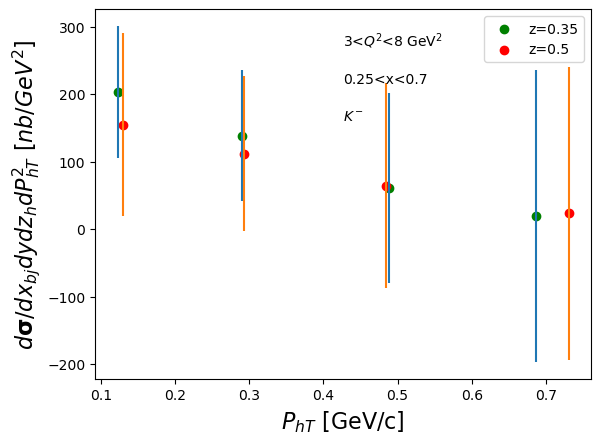

In [29]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.2,0.4,0.6,1.6]
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_hQ2_x2_pim_11_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']
    print('Q2 l',Q2_cuts[i_Q2-1])
    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        print('z l ',z_cuts[i_z-1])
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            print('df length after pt cut',len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*Kaon_sys
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.text(.5,.7,'$K^-$',transform=plt.gca().transAxes)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_hQ2_Pt_'+str(i_Q2)+'_11_pim_kaon.pdf')
file.close()

In [30]:

#for pip 8.8
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_lowQ2_Pt_lumi3_He3_kaon.dat',delim_whitespace=True)


In [31]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,8]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()

3.141592653589793


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
3870,3870,8.8,0.168865,0.449638,0.327117,1.235557,0.015030,FUUT,0.009104,0.000966,0.0,0.0,He3,K+,solid,0.000966
3871,3871,8.8,0.167437,0.454088,0.327090,1.235479,0.027933,FUUT,0.009015,0.000937,0.0,0.0,He3,K+,solid,0.000937
3872,3872,8.8,0.166520,0.457179,0.327064,1.235550,0.036564,FUUT,0.008941,0.000956,0.0,0.0,He3,K+,solid,0.000956
3873,3873,8.8,0.165398,0.461099,0.327040,1.236046,0.043474,FUUT,0.008853,0.000957,0.0,0.0,He3,K+,solid,0.000957
3874,3874,8.8,0.164378,0.464628,0.327112,1.236086,0.049486,FUUT,0.008776,0.000960,0.0,0.0,He3,K+,solid,0.000960


169
142
117
95
77
60


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

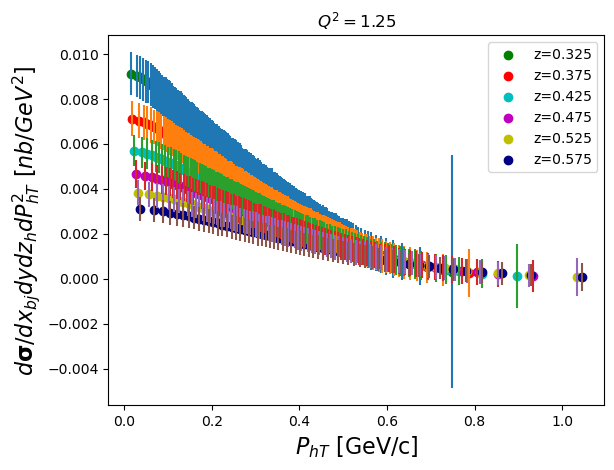

In [32]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


0.35
11
0.4
11
0.45
11
0.5
11
0.55
11
0.6
11


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

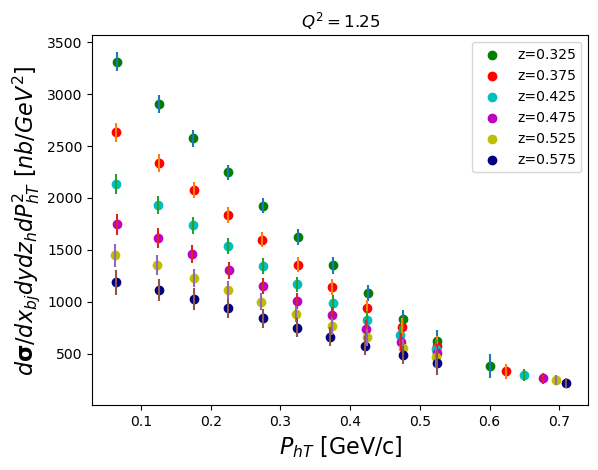

In [33]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers_kaon.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        #print(df_3xs_PhT['stat'].tolist())
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*Kaon_sys
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

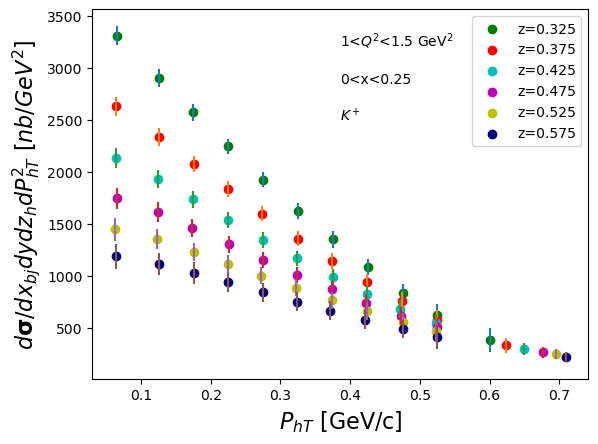

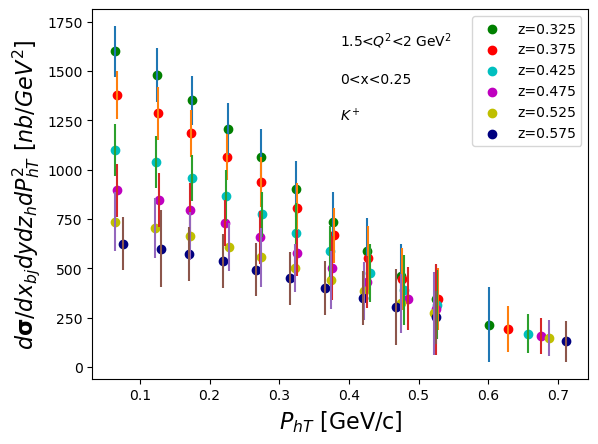

In [34]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pip_8p8_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
for i_Q2 in range(1,len(Q2_cuts)-2):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']
    
    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(df_3xs_PhT['stat'].tolist())
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*Kaon_sys
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$K^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_8p8_pip_kaon.pdf')
file.close()

2
         i  Ebeam         x         y         z        Q2        pT   obs   
4916  4916    8.8  0.230084  0.555986  0.327256  2.106817  0.043818  FUUT  \
4917  4917    8.8  0.229841  0.556963  0.327580  2.108304  0.082897  FUUT   
4918  4918    8.8  0.228108  0.561488  0.327742  2.109340  0.112037  FUUT   
4919  4919    8.8  0.226657  0.564602  0.327786  2.107100  0.139292  FUUT   
4920  4920    8.8  0.225707  0.566607  0.327911  2.105104  0.168286  FUUT   

         value      stat  systrel  systabs target hadron Experiment     error  
4916  0.002130  0.001247      0.0      0.0    He3     K+      solid  0.001247  
4917  0.002071  0.001251      0.0      0.0    He3     K+      solid  0.001251  
4918  0.002001  0.001286      0.0      0.0    He3     K+      solid  0.001286  
4919  0.001930  0.001274      0.0      0.0    He3     K+      solid  0.001274  
4920  0.001841  0.001250      0.0      0.0    He3     K+      solid  0.001250  
0.4
8
0.6
8


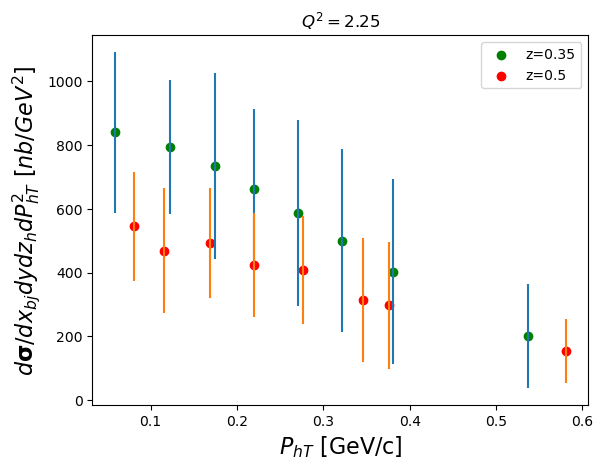

In [35]:
#For pip, lowQ2 2-2.5, x1
i_Q2=3
z_cuts=[0.3,0.4,0.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,1.6]
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pip_8p8_Q22-2.5_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
print(Q2_cuts[i_Q2-1])
print(df_3xs_z.head())
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        #print(df_3xs_PhT['stat'].tolist())
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_8p8_pip_kaon.pdf')
file.close()

In [36]:
#for pip, lowQ2, x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[1.5,2,2.5,3,8]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
df_3xs_zQ2.head()


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
4670,4670,8.8,0.266336,0.413455,0.327146,1.816510,0.055758,FUUT,0.003693,0.001039,0.0,0.0,He3,K+,solid,0.001039
4671,4671,8.8,0.268019,0.409153,0.327882,1.809070,0.104552,FUUT,0.003599,0.001065,0.0,0.0,He3,K+,solid,0.001065
4672,4672,8.8,0.268572,0.408957,0.328587,1.811875,0.143221,FUUT,0.003403,0.001127,0.0,0.0,He3,K+,solid,0.001127
4673,4673,8.8,0.268140,0.409341,0.328263,1.810664,0.187059,FUUT,0.003141,0.001100,0.0,0.0,He3,K+,solid,0.001100
4674,4674,8.8,0.268034,0.409508,0.328114,1.810682,0.236942,FUUT,0.002789,0.001101,0.0,0.0,He3,K+,solid,0.001101


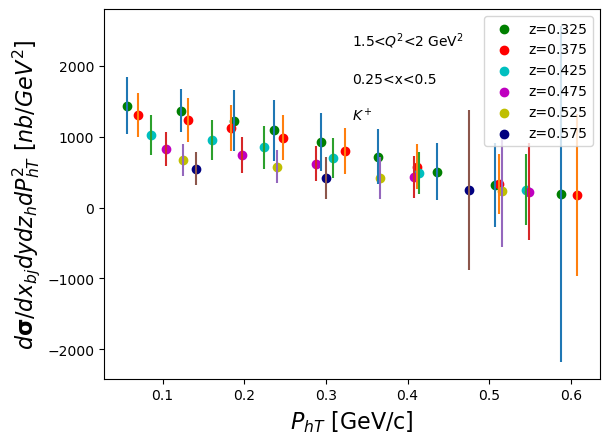

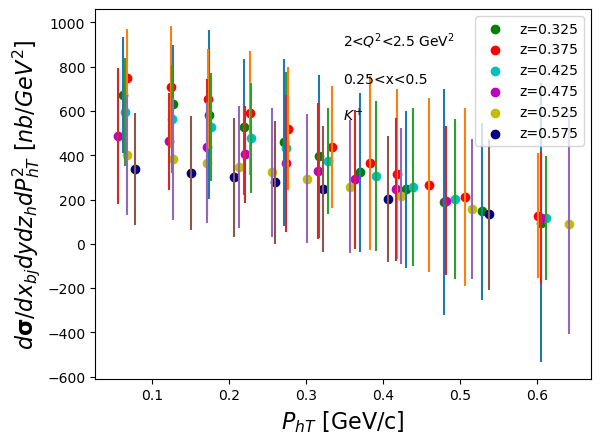

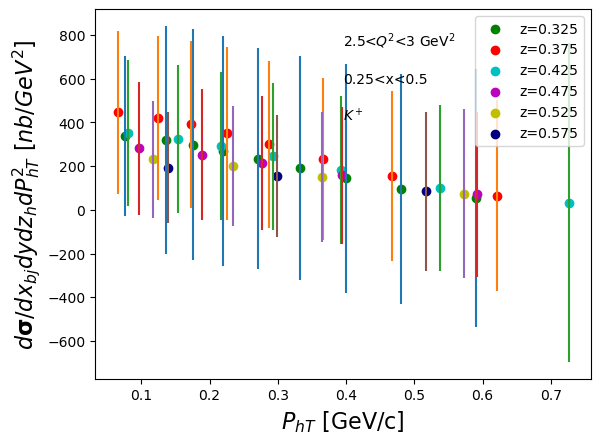

In [37]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pip_8p8_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*Kaon_sys
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$K^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x2_'+str(i_Q2)+'_8p8_pip_kaon.pdf')
file.close()

In [38]:

#for pim 8.8
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpim_lowQ2_Pt_lumi3_He3_kaon.dat',delim_whitespace=True)


In [39]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,8]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()

3.141592653589793


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
2589,2589,8.8,0.166184,0.455269,0.318090,1.230777,0.018602,FUUT,0.008486,0.001669,0.0,0.0,He3,K-,solid,0.001669
2590,2590,8.8,0.164222,0.461451,0.318101,1.230186,0.034261,FUUT,0.008372,0.001683,0.0,0.0,He3,K-,solid,0.001683
2591,2591,8.8,0.162500,0.468102,0.318265,1.232034,0.044505,FUUT,0.008250,0.001694,0.0,0.0,He3,K-,solid,0.001694
2592,2592,8.8,0.160518,0.474551,0.318415,1.231764,0.053102,FUUT,0.008152,0.001651,0.0,0.0,He3,K-,solid,0.001651
2593,2593,8.8,0.158799,0.480943,0.318643,1.232561,0.060970,FUUT,0.008050,0.001618,0.0,0.0,He3,K-,solid,0.001618


121
98
79
63
49
37


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

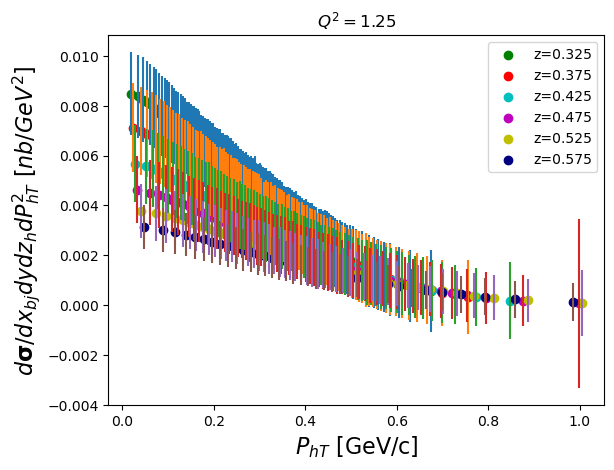

In [40]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


0.35
11
0.4
11
0.45
11
0.5
11
0.55
11
0.6
11


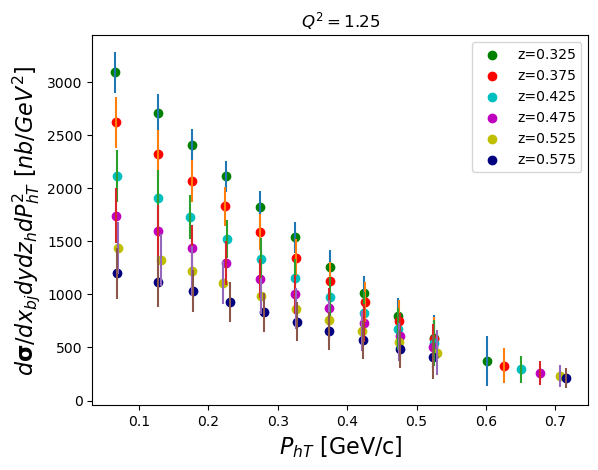

In [41]:
#plot for the Q2 bins
#plot for the Q2 bins
i_Q2=1
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pim_8p8_Q21-1.5_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        #print(df_3xs_PhT['stat'].tolist())
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'8p8_pim_kaon.pdf')
file.close()

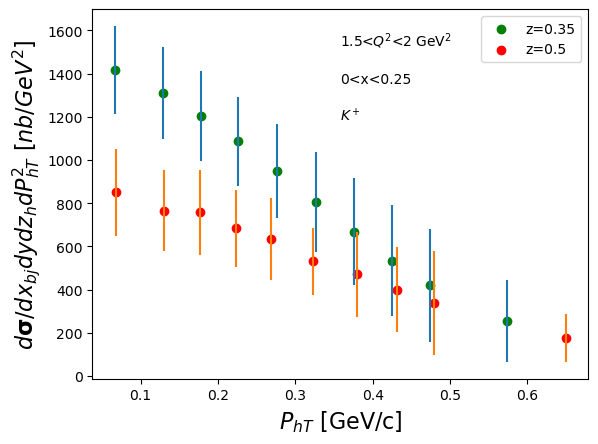

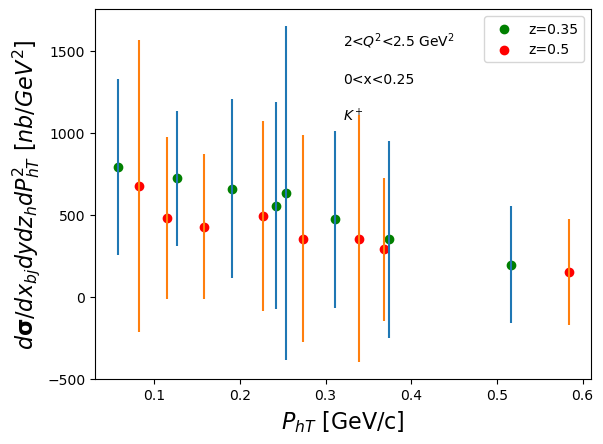

In [42]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pim_8p8_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
z_cuts=[0.3,0.4,0.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
for i_Q2 in range(2,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']
    if i_Q2==2:
        
        PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,1.6]
    if i_Q2==3:
        
        PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,1.6]
    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(df_3xs_PhT['stat'].tolist())
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*Kaon_sys
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            #print(_hadron)
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$K^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_8p8_pim_kaon.pdf')
file.close()

In [43]:
#for pip, lowQ2, x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[1.5,2,2.5,3,8]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
df_3xs_zQ2.head()


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
3126,3126,8.8,0.267452,0.415849,0.314902,1.834254,0.068567,FUUT,0.003239,0.001649,0.0,0.0,He3,K-,solid,0.001649
3127,3127,8.8,0.269239,0.413355,0.315983,1.835293,0.134653,FUUT,0.003026,0.001877,0.0,0.0,He3,K-,solid,0.001877
3128,3128,8.8,0.268831,0.413775,0.315729,1.834360,0.202129,FUUT,0.002654,0.001801,0.0,0.0,He3,K-,solid,0.001801
3129,3129,8.8,0.268608,0.413632,0.315517,1.832339,0.286542,FUUT,0.002097,0.001728,0.0,0.0,He3,K-,solid,0.001728
3130,3130,8.8,0.268331,0.413273,0.314794,1.829084,0.389194,FUUT,0.001405,0.001626,0.0,0.0,He3,K-,solid,0.001626


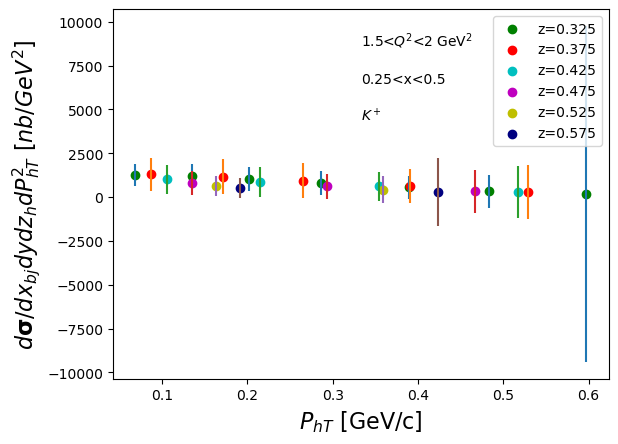

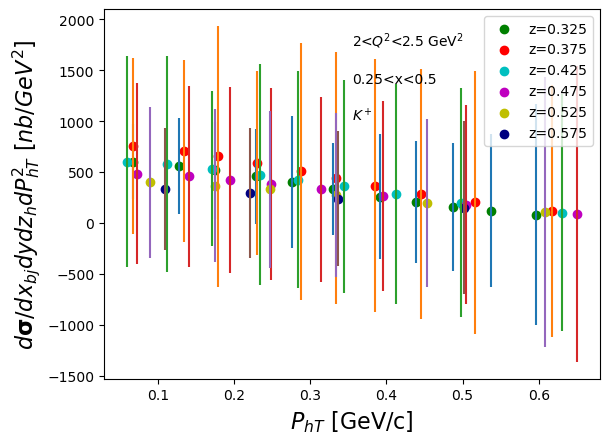

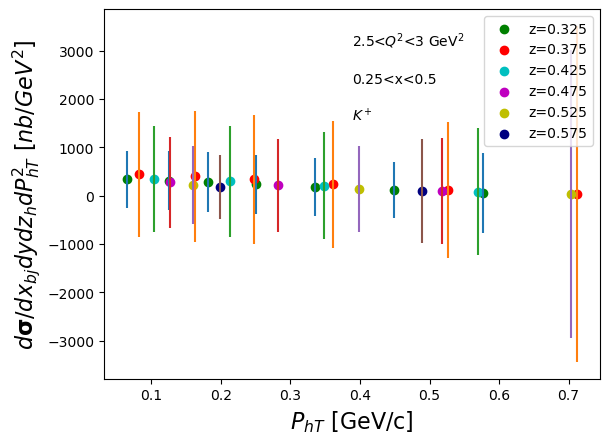

In [44]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pim_8p8_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*Kaon_sys
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$K^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x2_'+str(i_Q2)+'_8p8_pim_kaon.pdf')
file.close()

In [45]:
#for pim 8.8 hQ2
df_3xs_x2_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpim_highQ2_Pt_lumi3_He3_kaon.dat',delim_whitespace=True)

df_3xs_x2_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.316130,0.522807,0.321877,3.375876,0.021249,FUUT,0.000747,0.001764,0.0,0.0,He3,K-,solid,0.001764
1,1,11.0,0.317173,0.520924,0.321875,3.372485,0.039323,FUUT,0.000742,0.001731,0.0,0.0,He3,K-,solid,0.001731
2,2,11.0,0.318232,0.519507,0.321855,3.371510,0.051454,FUUT,0.000737,0.001722,0.0,0.0,He3,K-,solid,0.001722
3,3,11.0,0.319240,0.518280,0.321946,3.371684,0.061360,FUUT,0.000729,0.001742,0.0,0.0,He3,K-,solid,0.001742
4,4,11.0,0.320054,0.517114,0.322003,3.370592,0.069846,FUUT,0.000724,0.001761,0.0,0.0,He3,K-,solid,0.001761


In [46]:
xbj_cuts=[0.25,0.7]
Q2_cuts=[3,8]
df_3xs_zQ2=df_3xs_x2_zQ2xbjPhT[(df_3xs_x2_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x2_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x2_zQ2xbjPhT['x']<xbj_cuts[1])]
print(len(df_3xs_zQ2))
z_cuts=[0.3,0.4,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5,1.6]
df_3xs_zQ2.head()

52


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
590,590,8.8,0.368901,0.558483,0.322047,3.392204,0.051261,FUUT,0.000498,0.001857,0.0,0.0,He3,K-,solid,0.001857
591,591,8.8,0.370779,0.556579,0.322192,3.395466,0.099949,FUUT,0.000474,0.001875,0.0,0.0,He3,K-,solid,0.001875
592,592,8.8,0.375479,0.552454,0.322504,3.412364,0.140184,FUUT,0.000437,0.001907,0.0,0.0,He3,K-,solid,0.001907
593,593,8.8,0.376306,0.552136,0.322636,3.417496,0.181705,FUUT,0.000403,0.001964,0.0,0.0,He3,K-,solid,0.001964
594,594,8.8,0.374735,0.553422,0.322445,3.411441,0.229462,FUUT,0.000364,0.001902,0.0,0.0,He3,K-,solid,0.001902


28
21


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

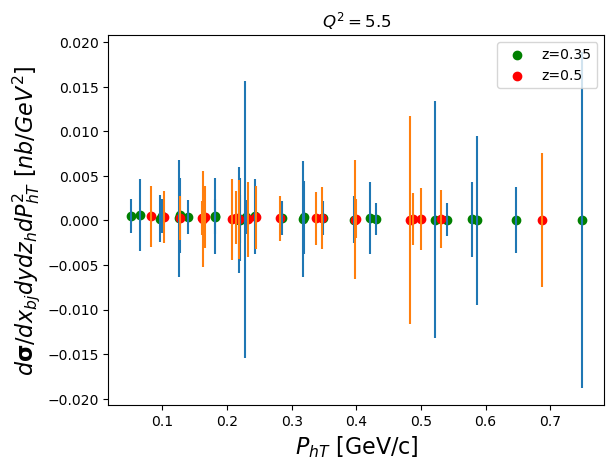

In [47]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


0.4
28
[0.001857, 0.001875, 0.004093, 0.002646]
[0.001907, 0.001964, 0.004191, 0.004245, 0.006573]
[0.001902, 0.001914, 0.004248, 0.00268, 0.004657, 0.015544, 0.005925]
[0.001878, 0.004099, 0.002653, 0.006513]
[0.001826, 0.004045]
[0.001888, 0.003698, 0.004232, 0.018844, 0.009478, 0.013309]
6
0.6
21
[0.003406]
[0.003474, 0.002901, 0.002453, 0.001875, 0.005375]
[0.003543, 0.002927, 0.002531, 0.00445, 0.004231, 0.00456]
[0.00345, 0.002974, 0.002175, 0.006621]
[0.002934, 0.011649]
[0.003513, 0.007542, 0.003255]
6


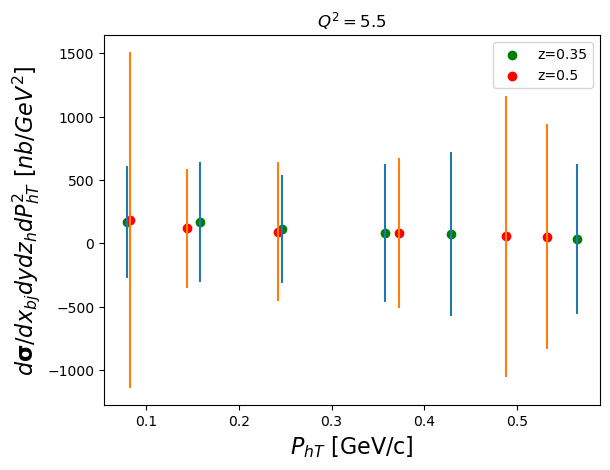

In [48]:
#plot for the Q2 bins
i_Q2=1
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pim_8p8_hQ2_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        print(df_3xs_PhT['stat'].tolist())
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_hQ2_8p8_pim_kaon.pdf')
file.close()

In [49]:
#for pip 8.8 hQ2
df_3xs_x2_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_highQ2_Pt_lumi3_He3_kaon.dat',delim_whitespace=True)

df_3xs_x2_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.318603,0.524146,0.323862,3.411246,0.017617,FUUT,0.000713,0.001240,0.0,0.0,He3,K+,solid,0.001240
1,1,11.0,0.319955,0.522328,0.323924,3.412053,0.032390,FUUT,0.000708,0.001243,0.0,0.0,He3,K+,solid,0.001243
2,2,11.0,0.320744,0.520859,0.324030,3.408873,0.042180,FUUT,0.000705,0.001239,0.0,0.0,He3,K+,solid,0.001239
3,3,11.0,0.321776,0.519603,0.324070,3.409462,0.050236,FUUT,0.000700,0.001228,0.0,0.0,He3,K+,solid,0.001228
4,4,11.0,0.322484,0.518625,0.324096,3.408557,0.057156,FUUT,0.000696,0.001257,0.0,0.0,He3,K+,solid,0.001257


In [50]:
xbj_cuts=[0.25,0.7]
Q2_cuts=[3,8]
df_3xs_zQ2=df_3xs_x2_zQ2xbjPhT[(df_3xs_x2_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x2_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x2_zQ2xbjPhT['x']<xbj_cuts[1])]
print(len(df_3xs_zQ2))
z_cuts=[0.3,0.4,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5,1.6]
df_3xs_zQ2.head()

83


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
962,962,8.8,0.372954,0.558622,0.324244,3.431107,0.041434,FUUT,0.000474,0.001294,0.0,0.0,He3,K+,solid,0.001294
963,963,8.8,0.373591,0.558101,0.324280,3.431647,0.078578,FUUT,0.000461,0.001320,0.0,0.0,He3,K+,solid,0.001320
964,964,8.8,0.375938,0.555586,0.324665,3.436672,0.106335,FUUT,0.000443,0.001319,0.0,0.0,He3,K+,solid,0.001319
965,965,8.8,0.379253,0.552804,0.325076,3.449327,0.132454,FUUT,0.000420,0.001326,0.0,0.0,He3,K+,solid,0.001326
966,966,8.8,0.381305,0.551074,0.325370,3.456603,0.158474,FUUT,0.000398,0.001377,0.0,0.0,He3,K+,solid,0.001377


40
38


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

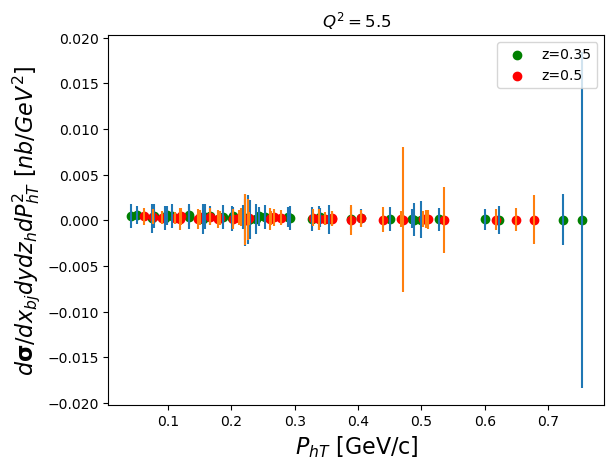

In [51]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


0.4
40
[0.001294, 0.00132, 0.001028, 0.001039, 0.001613, 0.001323]
[0.001319, 0.001326, 0.001377, 0.001343, 0.001058, 0.001057, 0.001649]
[0.00133, 0.001317, 0.001289, 0.001048, 0.001046, 0.001061, 0.001613, 0.002284, 0.001345, 0.002158, 0.002847, 0.002726]
[0.001284, 0.001274, 0.001043, 0.001585, 0.001317]
[0.001266, 0.001017, 0.001037, 0.002044, 0.001772]
[0.001269, 0.001565, 0.018413, 0.001114, 0.002786]
6
0.6
38
[0.000919, 0.000821, 0.000752]
[0.000933, 0.000909, 0.000816, 0.000746, 0.000678, 0.001194, 0.001059, 0.000975]
[0.000933, 0.000936, 0.000834, 0.00083, 0.000763, 0.000715, 0.001182, 0.002248, 0.001086, 0.00282]
[0.000926, 0.000841, 0.000798, 0.000744, 0.001136, 0.001639]
[0.000929, 0.000877, 0.00141, 0.007944]
[0.000969, 0.001294, 0.001183, 0.000835, 0.002707, 0.001029, 0.00359]
6


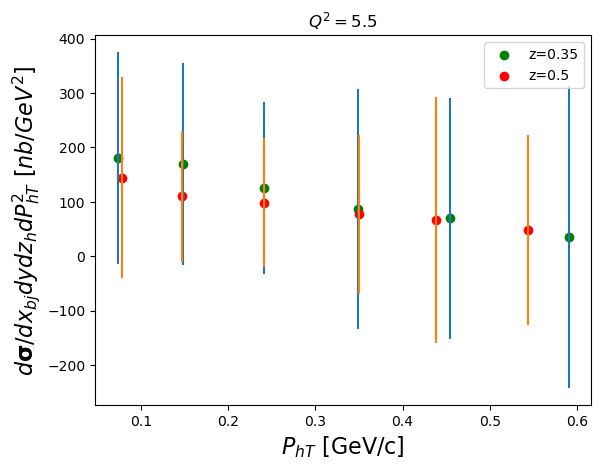

In [52]:
#plot for the Q2 bins
i_Q2=1
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pip_8p8_hQ2_He3_kaon.txt','w')
file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        print(df_3xs_PhT['stat'].tolist())
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_hQ2_8p8_pip_kaon.pdf')
file.close()